# Chapter 3 평가

# 1. 정확도 (Accuracy)

- 정확도 = 예측 결과가 동일한 데이터 건수 / 전체 예측 데이터 건수

- 이진 분류의 경우 데이터의 구성에 따라 ML모델의 성능을 왜곡할 수 있기 떄문에 정확도 수치 하나만 가지고 성능을 평가하지 않음.

In [ ]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
  # fit() 메서드는 아무것도 학습하지 않음.
  def fit(self,X,y=None):
    pass
  # predict() 메서드는 단순히 Sex 피치가 1이면 0, 그렇지 않으면 1로 예측함.
  def predict(self,X):
    pred=np.zeros((X.shape[0],1))
    for i in range(X.shape[0]):
      if X['Sex'].iloc[i]==1:
        pred[i]=0
      else:
        pred[i]=1
    return pred

In [ ]:
from sklearn import preprocessing

def fillna(df):
  df['Age'].fillna(df['Age'].mean(),inplace=True)
  df['Cabin'].fillna('N',inplace=True)
  df['Embarked'].fillna('N',inplace=True)
  df['Fare'].fillna(0, inplace=True)
  return df

def drop_features(df):
  df.drop(['PassengerId','Name','Ticket'],axis=1, inplace=True)
  return df

def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin','Sex','Embarked']
  for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titanic_df = pd.read_csv('/content/drive/MyDrive/Data/파이썬 머신러닝 완벽가이드/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop(['Survived'],axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df,y_titanic_df,test_size=0.2)

myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)
mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test,mypredictions)))
# 단순한 알고리즘으로 예측을 하였음에도 정확도가 높음 -> 정확도 평가 지표의 맹점

Dummy Classifier의 정확도는: 0.7430


In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
  def fit(self, X, y):
    pass
  def predict(self, X):
    return np.zeros((len(X),1),dtype='bool')

digits = load_digits()
y = (digits.target==7).astype('int')
X_train, X_test, y_train, y_test = train_test_split(digits.data, y)

# 불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기:',y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test,fakepred)))

레이블 테스트 세트 크기: (450,)
테스트 세트 레이블 0과 1의 분포도
0    410
1     40
dtype: int64
모든 예측을 0으로 하여도 정확도는:0.911


# 2. 오차 행렬(Confusion Matrix)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, fakepred)

array([[410,   0],
       [ 40,   0]])

# 3. 정밀도와 재현율

- **정밀도** (양성 예측도) = TP / (FP + TP) : 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율
- **재현율** (민감도,TPR) = TP / (FN + TP) : 실제 값이 Positive인 대상 중에 예측과 실제값이 Positive로 일치한 데이터의 비율
- 재현율이 중요 지표인 경우) 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우 (ex. 암 판단 모델, 금융 사기 적발 모델)
- 정밀도가 중요 지표인 경우) 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우 (ex. 스팸메일 여부를 판단하는 모델)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  print("오차 행렬")
  print(confusion)
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('/content/drive/MyDrive/Data/파이썬 머신러닝 완벽가이드/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop(['Survived'],axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df,y_titanic_df,test_size=0.2)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[97 12]
 [20 50]]
정확도: 0.8212, 정밀도: 0.8065, 재현율: 0.7143


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


정밀도 / 재현율 트레이드오프

predict_proba() 메서드

- predict()는 predict_proba() 메서드가 반환하는 확률 값을 가진 ndarray에서 정해진 임곗값을 만족하는 ndarray의 칼럼 위치를 최종 예측 클래스로 결정

In [ ]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba() 결과 Shape: {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출: \n',pred_proba[:3])

# 예측 확률 array와 예측 결괏값 array를 병합해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba,pred.reshape(-1,1)],axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])

pred_proba() 결과 Shape: (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출: 
 [[0.27815865 0.72184135]
 [0.85924011 0.14075989]
 [0.90668863 0.09331137]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.27815865 0.72184135 1.        ]
 [0.85924011 0.14075989 0.        ]
 [0.90668863 0.09331137 0.        ]]


Binarizer 클래스

- threshold 변수를 특정 값으로 설정하고 Binarizer 클래스를 객체로 생성. 

- 생성된 Binarizer 객체의 fit_transform()메서드를 이용해 넘파이 ndarray를 입력하면 입력된 ndarray의 값을 지정된 threshold보다 같거나 작으면 0값으로, 크면 1값으로 변환해 반환.

In [ ]:
from sklearn.preprocessing import Binarizer
X=[[1,-1,2],
   [2,0,0],
   [0,1.1,1.2]]
  
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [ ]:
from sklearn.preprocessing import Binarizer
custom_threshold=0.5

# predict_proba() 반환값의 두 번째 칼럼, 즉 Posiive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test,custom_predict)

오차 행렬
[[97 12]
 [20 50]]
정확도: 0.8212, 정밀도: 0.8065, 재현율: 0.7143


In [ ]:
# Binarizer의 threshold 설정값을 0.4로 설정. 즉, 분류 결정 임계값을 0.5에서 0.4로 낮춤.
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test,custom_predict)
# 임계값을 낮추니 재현율은 올라가고 정밀도는 떨어짐.

오차 행렬
[[92 17]
 [15 55]]
정확도: 0.8212, 정밀도: 0.7639, 재현율: 0.7857


In [ ]:
# 임곗값을 0.4에서부터 0.6까지 0.05씩 증가시키며 평가 지표 조사

# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장
thresholds=[0.4,0.45,0.5,0.55,0.6]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
    custom_predict = binarizer.transform(pred_proba_c1)
    print('임계값: ',custom_threshold)
    get_clf_eval(y_test, custom_predict)
  
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1),thresholds)

임계값:  0.4
오차 행렬
[[92 17]
 [15 55]]
정확도: 0.8212, 정밀도: 0.7639, 재현율: 0.7857
임계값:  0.45
오차 행렬
[[95 14]
 [19 51]]
정확도: 0.8156, 정밀도: 0.7846, 재현율: 0.7286
임계값:  0.5
오차 행렬
[[97 12]
 [20 50]]
정확도: 0.8212, 정밀도: 0.8065, 재현율: 0.7143
임계값:  0.55
오차 행렬
[[101   8]
 [ 25  45]]
정확도: 0.8156, 정밀도: 0.8491, 재현율: 0.6429
임계값:  0.6
오차 행렬
[[104   5]
 [ 28  42]]
정확도: 0.8156, 정밀도: 0.8936, 재현율: 0.6000


precision_recall_curve()

In [ ]:
from sklearn.metrics import precision_recall_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)

thr_index = np.arange(0,thresholds.shape[0],15)
print('샘플 추출을 위한 임곗값 배열의 index 10개 :', thr_index)
print('샘플용 10개의 임곗값:', np.round(thresholds[thr_index],2))

# 15 step 단위로 추출된 임곗값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도 : ', np.round(precisions[thr_index],3))
print('샘플 임계값별 재현율 : ', np.round(recalls[thr_index],3))

# 임곗값이 증가할수록 정밀도 값은 동시에 높아지나 재현율 값은 낮아짐.

반환된 분류 결정 임곗값 배열의 Shape: (167,)
샘플 추출을 위한 임곗값 배열의 index 10개 : [  0  15  30  45  60  75  90 105 120 135 150 165]
샘플용 10개의 임곗값: [0.06 0.09 0.1  0.1  0.14 0.19 0.34 0.51 0.61 0.73 0.87 0.97]
샘플 임계값별 정밀도 :  [0.405 0.437 0.462 0.512 0.578 0.634 0.727 0.806 0.894 0.938 1.    1.   ]
샘플 임계값별 재현율 :  [1.    0.986 0.943 0.914 0.9   0.843 0.8   0.714 0.6   0.429 0.243 0.029]


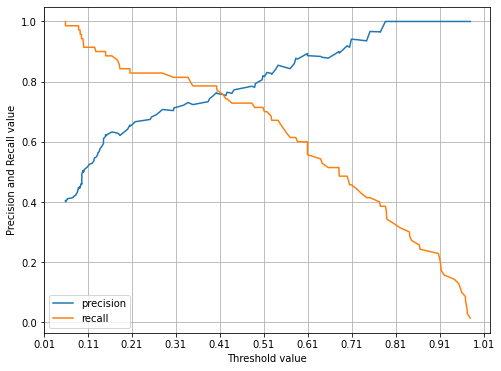

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test, pred_proba_c1):
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  plt.figure(figsize=(8,6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='-',label='precision')
  plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1),2))

  plt.xlabel('Threshold value')
  plt.ylabel('Precision and Recall value')
  plt.legend()
  plt.grid()
  plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

# 4. F1 스코어

- 정밀도와 재현율을 결합한 지표
- 정밀도와 재현율이 어느 한쪽으로 치우치지 않은 수치를 나타낼 때 상대적으로 높은 값을 가짐.

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7576


In [ ]:
def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  print('오차행렬')
  print(confusion)

  # F1 score print 추가  
  print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율:{2:.4f}, F1 : {3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임계값:  0.4
오차행렬
[[92 17]
 [15 55]]
정확도 : 0.8212, 정밀도 : 0.7639, 재현율:0.7857, F1 : 0.7746
임계값:  0.45
오차행렬
[[95 14]
 [19 51]]
정확도 : 0.8156, 정밀도 : 0.7846, 재현율:0.7286, F1 : 0.7556
임계값:  0.5
오차행렬
[[97 12]
 [20 50]]
정확도 : 0.8212, 정밀도 : 0.8065, 재현율:0.7143, F1 : 0.7576
임계값:  0.55
오차행렬
[[101   8]
 [ 25  45]]
정확도 : 0.8156, 정밀도 : 0.8491, 재현율:0.6429, F1 : 0.7317
임계값:  0.6
오차행렬
[[104   5]
 [ 28  42]]
정확도 : 0.8156, 정밀도 : 0.8936, 재현율:0.6000, F1 : 0.7179


# 5. ROC 곡선과 AUC

In [ ]:
from sklearn.metrics import roc_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

thr_index = np.arange(1,thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index 10개 : ', thr_index)
print('샘플용 10개의 임곗값 : ', np.round(thresholds[thr_index],2))

# 5 step 단위로 추출된 임곗값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR:', np.round(fprs[thr_index],3))
print('샘플 임곗값별 TPR:', np.round(tprs[thr_index],3))

샘플 추출을 위한 임곗값 배열의 index 10개 :  [ 1  6 11 16 21 26 31 36 41 46 51 56]
샘플용 10개의 임곗값 :  [0.98 0.71 0.66 0.54 0.49 0.4  0.21 0.15 0.13 0.1  0.09 0.06]
샘플 임곗값별 FPR: [0.    0.018 0.046 0.073 0.128 0.156 0.284 0.349 0.486 0.642 0.761 0.945]
샘플 임곗값별 TPR: [0.014 0.457 0.514 0.671 0.714 0.786 0.829 0.886 0.914 0.943 0.957 1.   ]


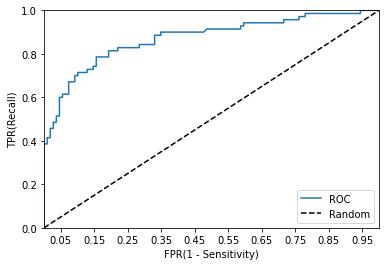

In [ ]:
def roc_curve_plot(y_test, pred_proba_c1):
  fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
  plt.plot(fprs, tprs, label='ROC')
  plt.plot([0,1],[0,1],'k--', label='Random')

  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1),2))
  plt.xlim(0,1)
  plt.ylim(0,1)
  plt.xlabel('FPR(1 - Sensitivity)')
  plt.ylabel('TPR(Recall)')
  plt.legend()

roc_curve_plot(y_test, pred_proba[:,1])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  roc_auc = roc_auc_score(y_test, pred_proba)

  print('오차행렬')
  print(confusion)
  print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율:{2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

# 6. 피마 인디언 당뇨병 예측

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('/content/drive/MyDrive/Data/파이썬 머신러닝 완벽가이드/diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
X= diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test,pred, pred_proba)

오차행렬
[[97  4]
 [25 28]]
정확도 : 0.8117, 정밀도 : 0.8750, 재현율:0.5283, F1 : 0.6588, AUC : 0.8218


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


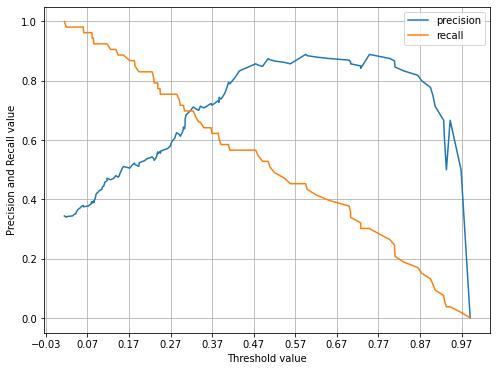

In [ ]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [ ]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

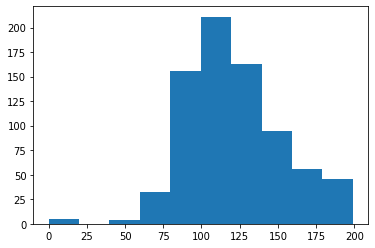

In [ ]:
plt.hist(diabetes_data['Glucose'], bins=10)

In [ ]:
# 0값 피처가 0값의 건수 및 전체 데이터 건수 대비 비율 조사
zero_features = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
total_count = diabetes_data['Glucose'].count()

for feature in zero_features:
  zero_count = diabetes_data[diabetes_data[feature]==0][feature].count()
  print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature,zero_count,100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


In [ ]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0,mean_zero_features)

In [ ]:
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[84 16]
 [21 33]]
정확도 : 0.7597, 정밀도 : 0.6735, 재현율:0.6111, F1 : 0.6408, AUC : 0.8231


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
    custom_predict = binarizer.transform(pred_proba_c1)
    print('임계값: ',custom_threshold)
    get_clf_eval(y_test , custom_predict, pred_proba_c1)

In [ ]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1),thresholds)

임계값:  0.3
오차행렬
[[68 32]
 [ 9 45]]
정확도 : 0.7338, 정밀도 : 0.5844, 재현율:0.8333, F1 : 0.6870, AUC : 0.8231
임계값:  0.33
오차행렬
[[71 29]
 [11 43]]
정확도 : 0.7403, 정밀도 : 0.5972, 재현율:0.7963, F1 : 0.6825, AUC : 0.8231
임계값:  0.36
오차행렬
[[73 27]
 [15 39]]
정확도 : 0.7273, 정밀도 : 0.5909, 재현율:0.7222, F1 : 0.6500, AUC : 0.8231
임계값:  0.39
오차행렬
[[75 25]
 [18 36]]
정확도 : 0.7208, 정밀도 : 0.5902, 재현율:0.6667, F1 : 0.6261, AUC : 0.8231
임계값:  0.42
오차행렬
[[79 21]
 [19 35]]
정확도 : 0.7403, 정밀도 : 0.6250, 재현율:0.6481, F1 : 0.6364, AUC : 0.8231
임계값:  0.45
오차행렬
[[82 18]
 [21 33]]
정확도 : 0.7468, 정밀도 : 0.6471, 재현율:0.6111, F1 : 0.6286, AUC : 0.8231
임계값:  0.48
오차행렬
[[84 16]
 [21 33]]
정확도 : 0.7597, 정밀도 : 0.6735, 재현율:0.6111, F1 : 0.6408, AUC : 0.8231
임계값:  0.5
오차행렬
[[84 16]
 [21 33]]
정확도 : 0.7597, 정밀도 : 0.6735, 재현율:0.6111, F1 : 0.6408, AUC : 0.8231


In [ ]:
# 임곗값을 0.48로 낮추고 다시 예측
# predict() 메서드는 임곗값을 마음대로 변환 불가 -> Binarizer 클래스를 이용해 predict_proba()로 추출한 예측 결과 확률값을 변환
binarizer = Binarizer(threshold=0.48)
pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))
get_clf_eval(y_test, pred_th_048, pred_proba[:,1])

오차행렬
[[84 16]
 [21 33]]
정확도 : 0.7597, 정밀도 : 0.6735, 재현율:0.6111, F1 : 0.6408, AUC : 0.8231
